# Excercise_8 : Decision Trees on Amazon Fine Food Review Dataset

**Objective:** To apply decision tree classifier on amazon fine food review datset and to find the performance of the model.

**Steps:**
1. Import the dataset and required libraries.
2. Perform Deduplication and sort thw dataset according to thetimestamp.
3. Take the top 100000 samples from the dataset.
4. Remove HTML Tags,punctuation,non-alphanumeric characters,words whose length is less than 2.
5. Perform Snowball stemming and encode the vectors and store the preocessed text.
6. Use gridsearch to find the optimal max_depth of the DecisionTreeClassifier model.
7. Plot the train and Cross-validation scores against the max_depth values.
8. Obtain the scores of the model on train and test data and plot the confusion matrices.
9. Obtain important features of the BOW and TFIDF Vectorizers.
10. Visualise the decision trees using Graphviz.


**Import the Libraries**

In [0]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import pickle
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,recall_score,f1_score,roc_auc_score
from gensim.models import Word2Vec
import graphviz
from sklearn.tree import export_graphviz
from IPython.display import Image
from tqdm import tqdm
import seaborn as sn
from prettytable import PrettyTable
from google.colab import drive
drive.mount('/content/drive')

**Import the Dataset**

In [0]:
f = open('x_train.pkl','rb')
x_train = pickle.load(f)
f = open('x_test.pkl','rb')
x_test = pickle.load(f)
f = open('y_train.pkl','rb')
y_train = pickle.load(f)
f = open('y_test.pkl','rb')
y_test = pickle.load(f)

#Bag Of Words

In [0]:
#train a bow model 

bow_model = CountVectorizer()
bow_train = bow_model.fit_transform(x_train)
bow_test = bow_model.transform(x_test)

In [0]:
print('Length of the bow vectors',bow_train.shape[1])

Length of the bow vectors 77106


**Hyperparameter Tuning**

In [0]:
#Train a Decision Tree Classifier

DT = DecisionTreeClassifier(min_samples_leaf=100) #min_samlples_leaf = value to avoid overfitting
depths = {'max_depth' : np.arange(3,30,5)}
grid_model = GridSearchCV(DT,depths,scoring='f1',cv=5,n_jobs=-1)
grid_model.fit(bow_train,y_train) 

print('The optimal depth of the decision_tree is ',grid_model.best_estimator_.max_depth)

The optimal depth of the decision_tree is  13


**Train-scores and Test-scores plot**

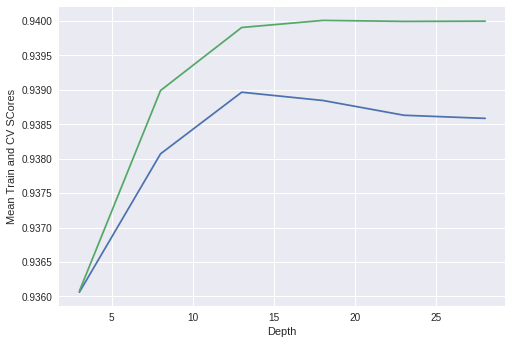

In [0]:
#plot train.test scores against depth values

plt.plot(grid_model.cv_results_['param_max_depth'].data,grid_model.cv_results_['mean_test_score'])
plt.plot(grid_model.cv_results_['param_max_depth'].data,grid_model.cv_results_['mean_train_score'])
plt.xlabel('Depth')
plt.ylabel('Mean Train and CV SCores')

plt.show()

**Observations:**
1. As the depth increases the train scores increased linearly which leads to overfitting.

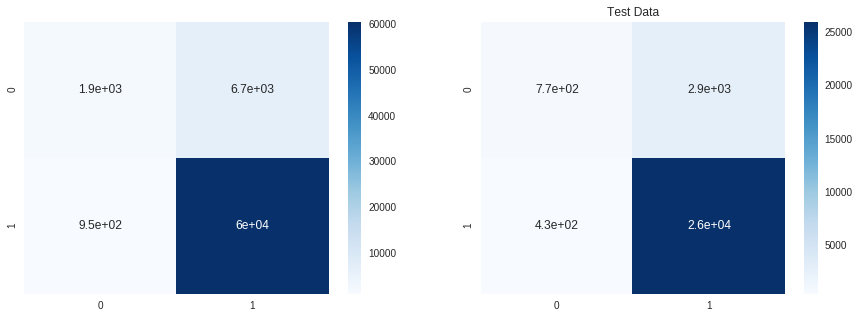

The f1_score of the model is 0.9403959103763323
The True Positive Rate is 0.983729662077597
The True Negative Rate is 0.6705882352941176
The Auc score of the model is  0.5983883653079975


In [0]:
#Predict on test and train data

train_pred = grid_model.predict(bow_train)
y_pred = grid_model.predict(bow_test)

conf = confusion_matrix(y_train,train_pred)
conf2 = confusion_matrix(y_test,y_pred)

plt.figure(1,figsize=(15,5))
plt.title('Train Data')
plt.subplot(1,2,1)
sn.heatmap(conf,annot=conf,cmap='Blues')
plt.subplot(1,2,2)
plt.title('Test Data')
sn.heatmap(conf2,annot=conf2,cmap='Blues')
plt.show()

print('The f1_score of the model is',grid_model.score(bow_test,y_test))
print('The True Positive Rate is',recall_score(y_test,y_pred))
print('The True Negative Rate is',conf[0][0]/(conf[0][0] + conf[1][0]))
print('The Auc score of the model is ',roc_auc_score(y_test,y_pred))

**Important Features**

In [0]:
important_features = np.argsort(grid_model.best_estimator_.feature_importances_)[::-1]
print('The important features of the model are ',np.take(bow_model.get_feature_names(),important_features[0:10]))

The important features of the model are  ['disappoint' 'worst' 'great' 'wast' 'horribl' 'best' 'love' 'return' 'aw'
 'bad']


**Visualize Decision Tree**

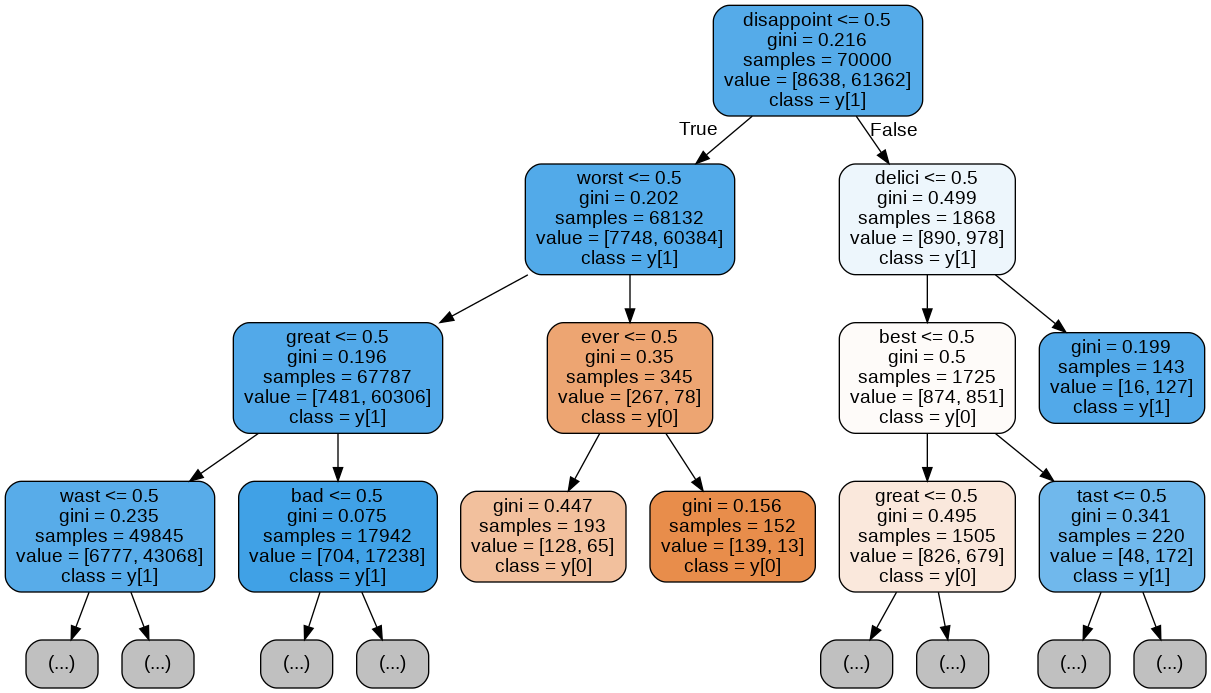

In [0]:
#Create a image file of the decision tree
graph = graphviz.Source(export_graphviz(grid_model.best_estimator_,max_depth=3,feature_names=bow_model.get_feature_names(),class_names=True,filled=True,rounded=True))
img = graph.pipe(format='png')
f = open('1.png','wb')
f.write(img)
Image(img)

# TF-IDF

In [0]:
tfidf_model = TfidfVectorizer()
tfidf_train = tfidf_model.fit_transform(x_train)
tfidf_test = tfidf_model.transform(x_test)

print('The number of unique words are ',tfidf_train.shape[1])

The number of unique words are  77106


In [0]:
#Train a decision tree classifier
DT = DecisionTreeClassifier(min_samples_leaf=100)
depths = {'max_depth' : np.arange(3,50,5)}
grid_model = GridSearchCV(DT,depths,scoring='f1_micro',cv=5,n_jobs=-1)
grid_model.fit(tfidf_train,y_train)

print('The optimal depth of the decision tree is',grid_model.best_estimator_.max_depth)

The optimal depth of the decision tree is 13


**Train and Test Scores plot**

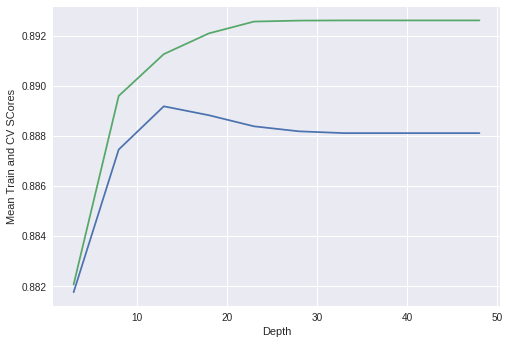

In [0]:
#plot train.test scores against depth values

plt.plot(grid_model.cv_results_['param_max_depth'].data,grid_model.cv_results_['mean_test_score'])
plt.plot(grid_model.cv_results_['param_max_depth'].data,grid_model.cv_results_['mean_train_score'])
plt.xlabel('Depth')
plt.ylabel('Mean Train and CV SCores')

plt.show()

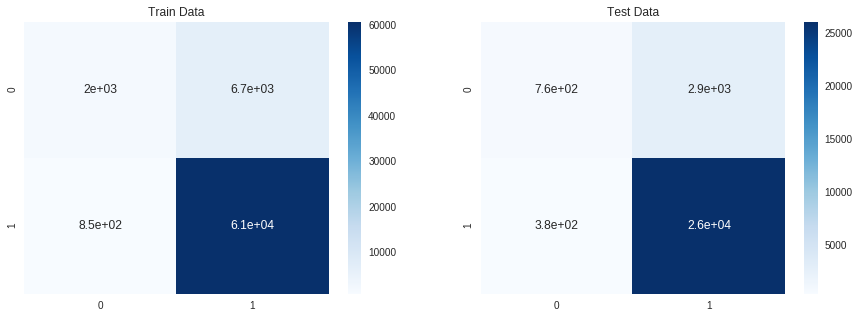

The True Negative Rate is  0.6991150442477876
The True positive Rate is  0.9857776766412562
The Auc score of the model is 0.5977608449267388


In [0]:
#predict on train and test data

train_pred = grid_model.predict(tfidf_train)
y_pred = grid_model.predict(tfidf_test)

conf = confusion_matrix(y_train,train_pred)
conf2 = confusion_matrix(y_test,y_pred)

plt.figure(1,figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Train Data')
sn.heatmap(conf,annot=conf,cmap='Blues')
plt.subplot(1,2,2)
plt.title('Test Data')
sn.heatmap(conf2,annot=conf2,cmap='Blues')
plt.show()

print('The True Negative Rate is ',conf[0][0]/(conf[0][0] + conf[1][0]))
print('The True positive Rate is ',recall_score(y_test,y_pred))
print('The Auc score of the model is',roc_auc_score(y_test,y_pred))

**Important Features**

In [0]:
important_features = np.argsort(grid_model.best_estimator_.feature_importances_)[::-1]
print('The important features of the model are ',np.take(tfidf_model.get_feature_names(),important_features[0:10]))

The important features of the model are  ['disappoint' 'worst' 'great' 'wast' 'horribl' 'best' 'love' 'return' 'aw'
 'bad']


**Visualize Decision Tree**

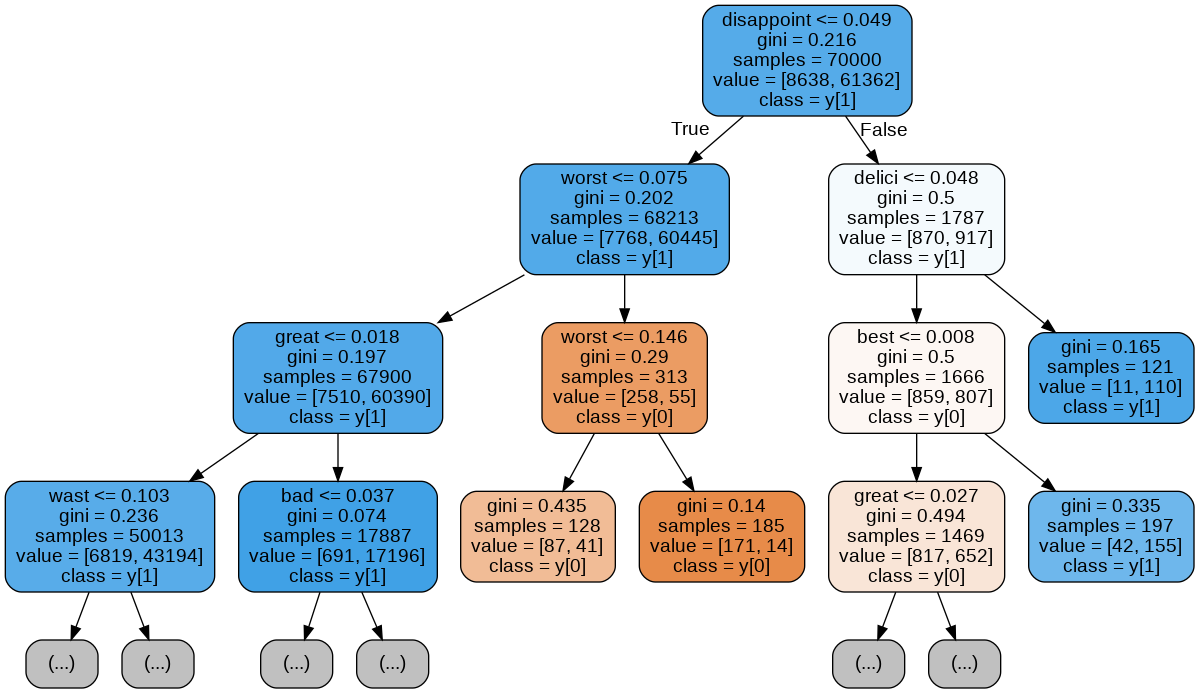

In [0]:
graph = graphviz.Source(export_graphviz(grid_model.best_estimator_,max_depth=3,feature_names=tfidf_model.get_feature_names(),class_names=True,filled=True,rounded=True))
img = graph.pipe(format='png')

f = open('2.png','wb')
f.write(img)
f.close()

Image(img)

# Average Word2Vec

In [0]:
#Create list of Lists of sentences
list_of_sent_train = []
for i in x_train.values:
  list_of_sent_train.append(i.split())
list_of_sent_test = []
for i in x_test.values:
  list_of_sent_test.append(i.split())
  
w2v_model = Word2Vec(list_of_sent_train,min_count=5,size=50)
w2v_words = list(w2v_model.wv.vocab)

# compute average word2vec for each review.
sent_vectors_x_train = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sent_train): # for each review/sentence
    sent_vec_x_train = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec_x_train += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec_x_train /= cnt_words
    sent_vectors_x_train.append(sent_vec_x_train)
    
# compute average word2vec for each review.
sent_vectors_x_test = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sent_test): # for each review/sentence
    sent_vec_x_test = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec_x_test += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec_x_test /= cnt_words
    sent_vectors_x_test.append(sent_vec_x_test)

100%|██████████| 30000/30000 [00:52<00:00, 568.74it/s]


**Hyperparameter Tuning**

In [0]:
#Find optimal max_depth using GridSearchCV

DT = DecisionTreeClassifier(min_samples_leaf=100)
depths = {'max_depth' : np.arange(3,50,5)}

grid_model = GridSearchCV(DT,depths,scoring='f1',cv=5,n_jobs=-1)
grid_model.fit(sent_vectors_x_train,y_train)

print('The optimal max_depth found using grid search is',grid_model.best_estimator_.max_depth)

The optimal max_depth found using grid search is 8


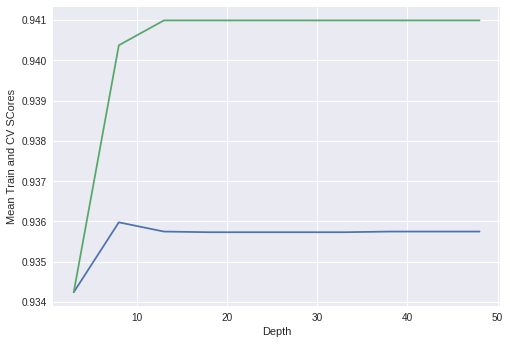

In [0]:
#plot train.test scores against depth values

plt.plot(grid_model.cv_results_['param_max_depth'].data,grid_model.cv_results_['mean_test_score'])
plt.plot(grid_model.cv_results_['param_max_depth'].data,grid_model.cv_results_['mean_train_score'])
plt.xlabel('Depth')
plt.ylabel('Mean Train and CV SCores')

plt.show()

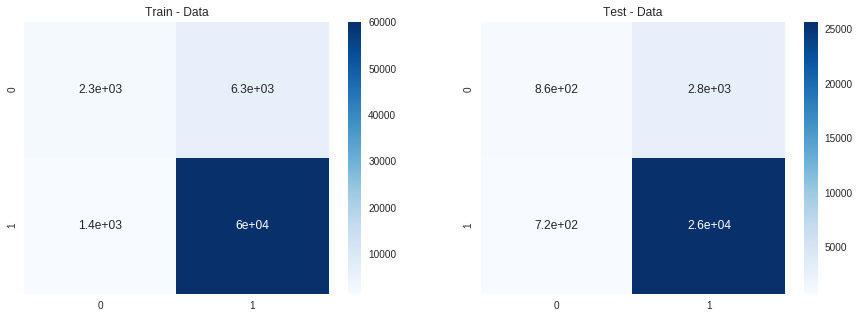

The f1_score is 0.9362828304951724
True Negatie Rate is, 0.6325203252032521
True Positie Rate is  0.9727689915424583
The auc score  is  0.6047439782925613


In [0]:
#Predict on train and test data

train_pred = grid_model.predict(sent_vectors_x_train)
y_pred = grid_model.predict(sent_vectors_x_test)

conf = confusion_matrix(y_train,train_pred)
conf2 = confusion_matrix(y_test,y_pred)

#plot confusion matrices 
plt.figure(1,figsize=(15,5))
plt.subplot(1,2,1)
sn.heatmap(conf,annot=conf,cmap='Blues')
plt.title('Train - Data')
plt.subplot(1,2,2)
sn.heatmap(conf2,annot=conf2,cmap='Blues')
plt.title('Test - Data')
plt.show()

print('The f1_score is',f1_score(y_test,y_pred))
print('True Negatie Rate is,',conf[0][0]/(conf[0][0] + conf[1][0]))
print('True Positie Rate is ',recall_score(y_test,y_pred))
print('The auc score  is ',roc_auc_score(y_test,y_pred))

# Tf-Idf Weighted Word2Vec

In [0]:
#tfidf model.
tfidf_model2 = TfidfVectorizer()
tfidf_x_train = tfidf_model2.fit_transform(x_train)
idf_dict = dict(zip(tfidf_model2.get_feature_names(),list(tfidf_model2.idf_)))

# tfidfw2v vectors

tfidf_x_train_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sent_train): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]

            tf_idf = idf_dict[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_x_train_vectors.append(sent_vec)

tfidf_x_test_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sent_test): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]

            tf_idf = idf_dict[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_x_test_vectors.append(sent_vec)

100%|██████████| 30000/30000 [01:19<00:00, 378.05it/s]


In [0]:
#train a decision tree classifier on train data.
DT = DecisionTreeClassifier()

depths = {'max_depth' : np.arange(3,50,5)}

grid_model = GridSearchCV(DT,depths,scoring='f1_micro',cv=5,n_jobs=-1)
grid_model.fit(tfidf_x_train_vectors,y_train)

print('The optimal depth found by grid search is',grid_model.best_estimator_.max_depth)

The optimal depth found by grid search is 8


**Train Test Scores Plot**

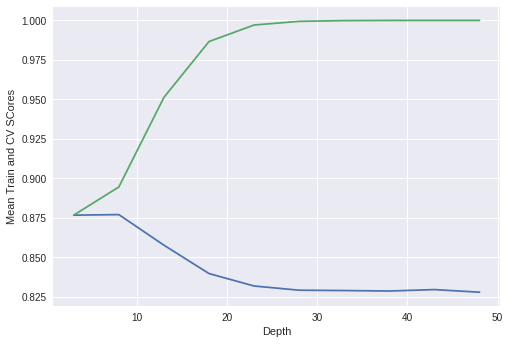

In [0]:
#plot train.test scores against depth values

plt.plot(grid_model.cv_results_['param_max_depth'].data,grid_model.cv_results_['mean_test_score'])
plt.plot(grid_model.cv_results_['param_max_depth'].data,grid_model.cv_results_['mean_train_score'])
plt.xlabel('Depth')
plt.ylabel('Mean Train and CV SCores')

plt.show()

**Observations:**
1. As the max_depth increases train scores are very high 1.0 and test scores are low which leads to overfitting.

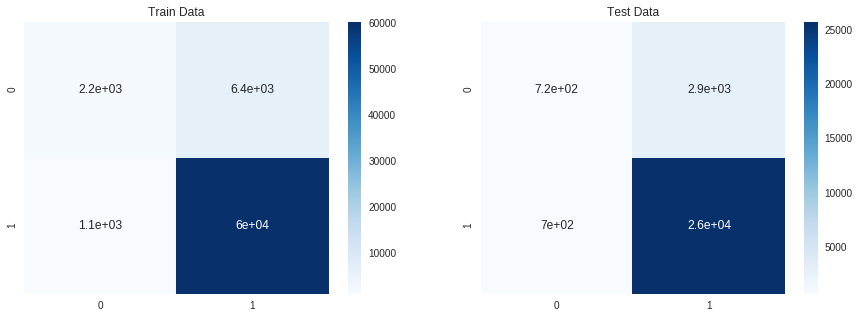

The Positive Rate of the model is 0.9736412940417947
The True Negative Rate of the model is 0.5074415308291992
The f1_score of the model is 0.9342746924812577
The auc score of the model is 0.5853617975851693


In [0]:
#prediction on test and train data

y_pred = grid_model.predict(tfidf_x_test_vectors)
train_pred = grid_model.predict(tfidf_x_train_vectors)

conf = confusion_matrix(y_test,y_pred)
conf2 = confusion_matrix(y_train,train_pred)

plt.figure(1,figsize=(15,5))
plt.subplot(1,2,1)
sn.heatmap(conf2,annot=conf2,cmap='Blues')
plt.title('Train Data')
plt.subplot(1,2,2)
sn.heatmap(conf,annot=conf,cmap='Blues')
plt.title('Test Data')

plt.show()
print('The Positive Rate of the model is',recall_score(y_test,y_pred))
print('The True Negative Rate of the model is',conf[0][0]/(conf[0][0] + conf[1][0]))
print('The f1_score of the model is',f1_score(y_test,y_pred))
print('The auc score of the model is',roc_auc_score(y_test,y_pred))

# Conclusion:

In [0]:
x = PrettyTable()
x.field_names = ['Vectorizer','max_depth']
x.add_row(['BagOfWords','13'])
x.add_row(['TF-IDF','13'])
x.add_row(['Average Word2Vec','13'])
x.add_row(['TF-IDF Weighed Word2Vec','8'])
print(x)

+-------------------------+-----------+
|        Vectorizer       | max_depth |
+-------------------------+-----------+
|        BagOfWords       |     13    |
|          TF-IDF         |     13    |
|     Average Word2Vec    |     13    |
| TF-IDF Weighed Word2Vec |     8     |
+-------------------------+-----------+
